### Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('BreastCancer Dataset/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Visualisation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
y = df['diagnosis']

x = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)

In [7]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
y.unique()

array(['M', 'B'], dtype=object)

In [10]:
y = y.map({'M':1, 'B':0})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

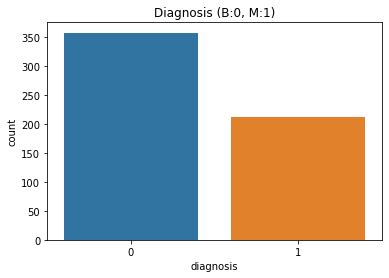

In [11]:
sns.countplot(x=y)
plt.title('Diagnosis (B:0, M:1)')
plt.show()

In [12]:
std_scaler = StandardScaler()

std_x = pd.DataFrame(std_scaler.fit_transform(x), columns=x.columns)

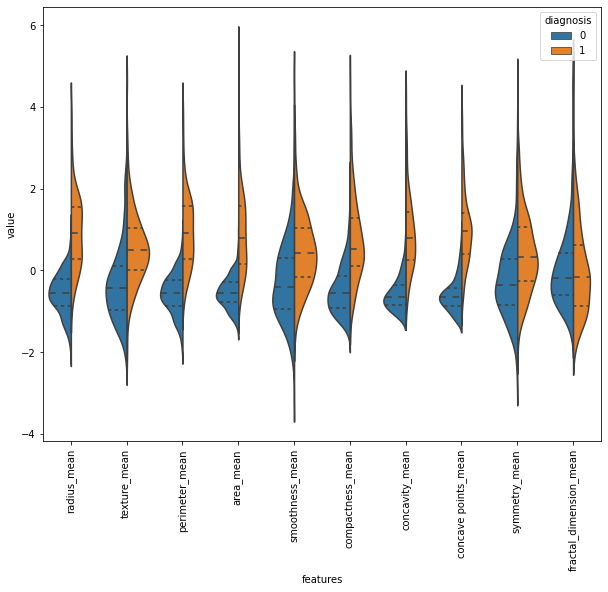

In [13]:
data = pd.concat([y,std_x.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

We can select features with significant difference between their median.
* radius_mean
* texture_mean
* perimeter_mean
* area_mean
* smoothness_mean
* compactness_mean
* concativity_mean
* concavepoints_mean
* symmetry_mean

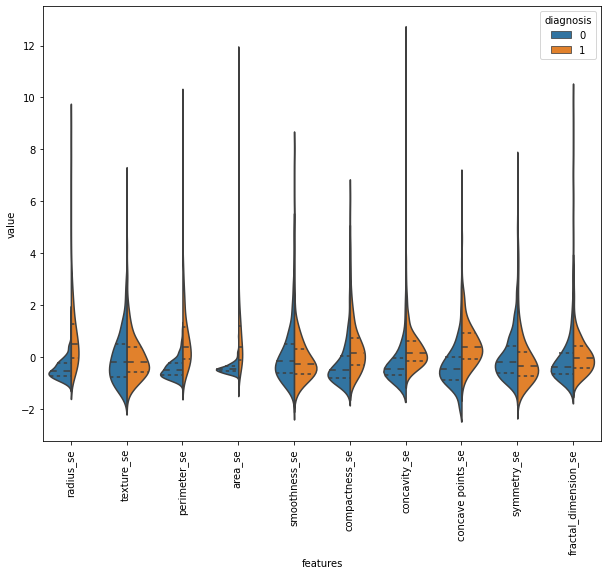

In [14]:
data = pd.concat([y,std_x.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

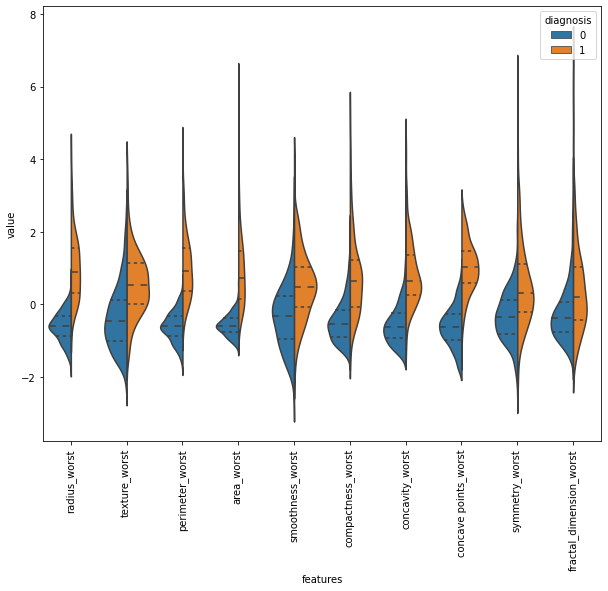

In [15]:
data = pd.concat([y,std_x.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

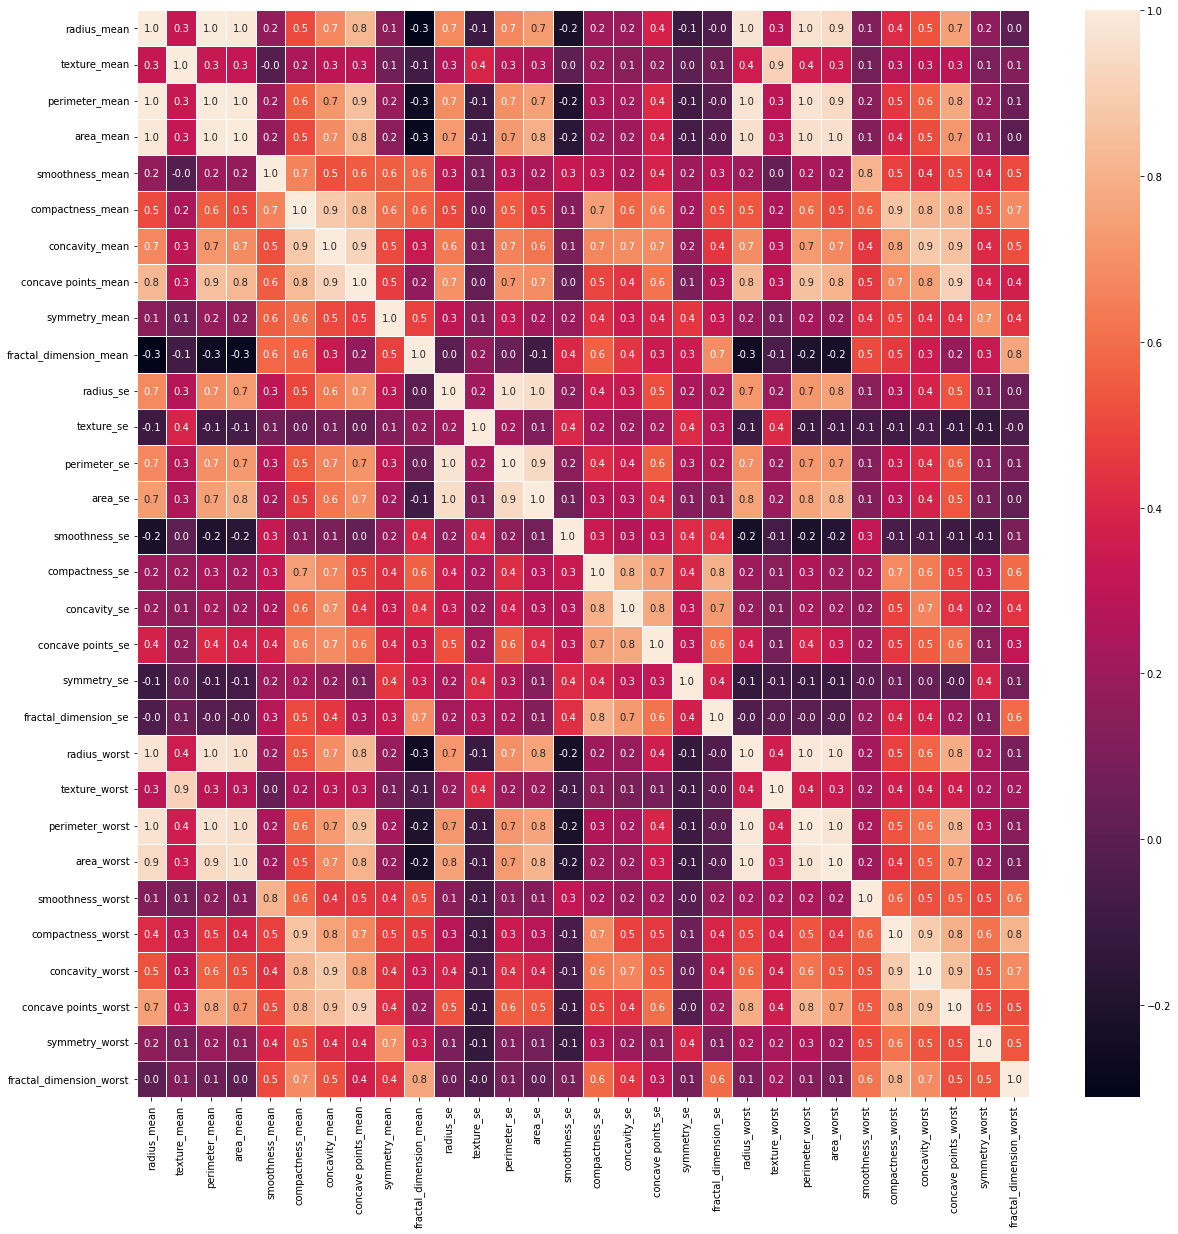

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

Correlation:
   * radius_mean, perimeter_mean, area_mean
   * compactness_mean, concativity_mean, concave points_mean

similar for se and worst

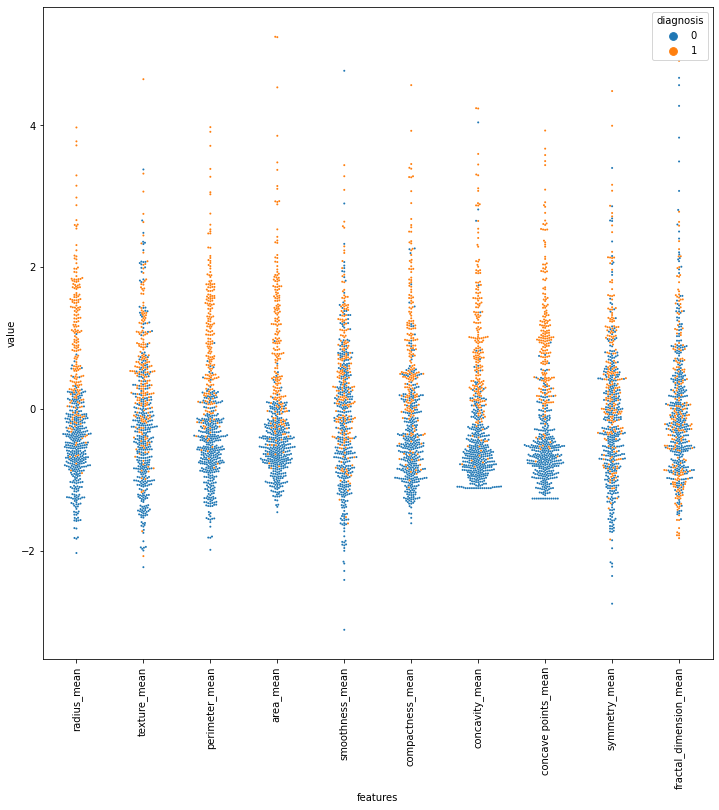

In [17]:
data = pd.concat([y,std_x.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


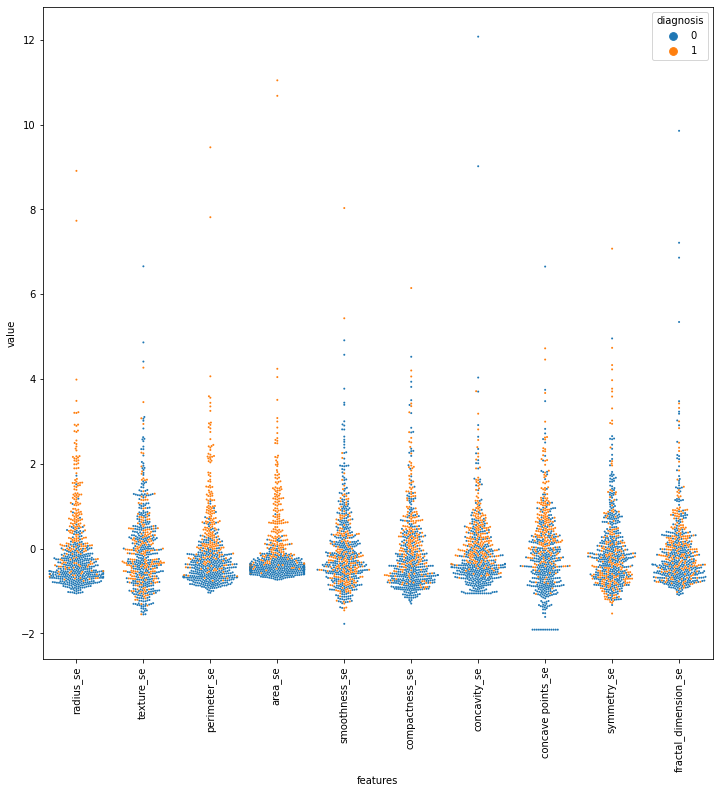

In [18]:
data = pd.concat([y,std_x.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)
plt.xticks(rotation=90)
plt.show()

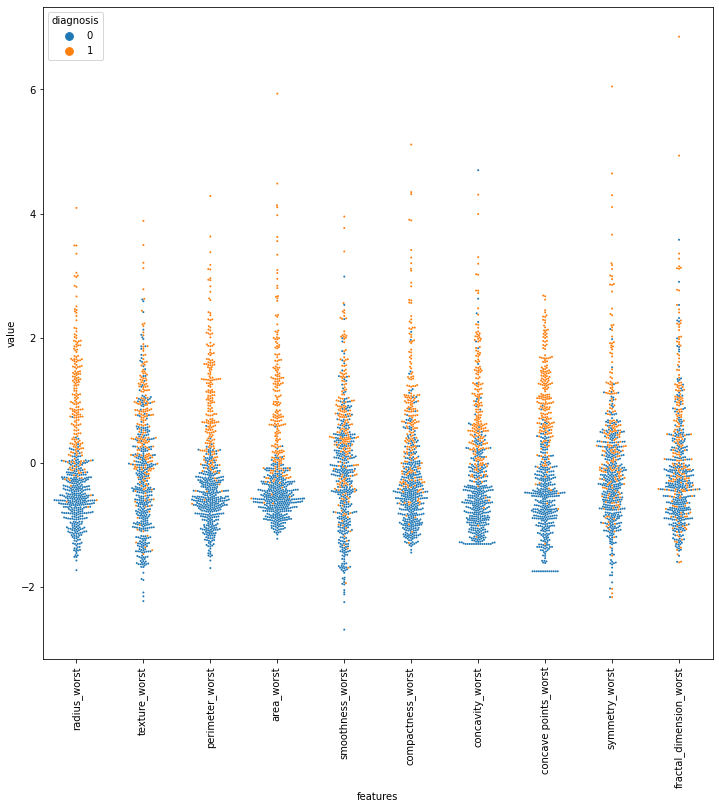

In [19]:
data = pd.concat([y,std_x.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,12))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

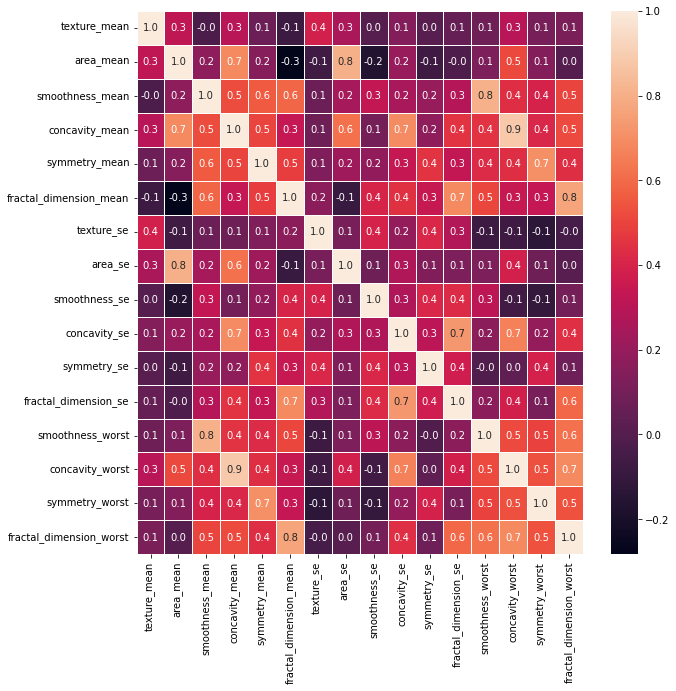

In [20]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

plt.figure(figsize=(10, 10))
sns.heatmap(x.drop(drop_list1, axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f')

### Feature Selection and Model  Development

In [21]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = std_x.drop(drop_list1, axis=1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,2.487578,-0.214002,0.724026,1.148757,0.907083,1.307686,2.109526,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,0.742402,-0.605351,-0.440780,-0.805450,-0.099444,-0.375612,-0.146749,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,1.181336,-0.297005,0.213076,0.237036,0.293559,0.527407,0.854974,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,-0.288378,0.689702,0.819518,4.732680,2.047511,3.394275,1.989588,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.190357,1.483067,0.828471,-0.361092,0.499328,0.220556,0.613179,-0.868353,-0.397100


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.30)

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
print(accuracy_score(y_test,rfc.predict(X_test)))
print()
print(confusion_matrix(y_test,rfc.predict(X_test)))

0.9649122807017544

[[107   2]
 [  4  58]]


In [25]:
cv_strategy = KFold(shuffle=True)
scores = cross_val_score(RandomForestClassifier(), x_1, y, cv=cv_strategy, scoring='accuracy')
print("Cross-validated scores:", scores)

Cross-validated scores: [0.97368421 0.95614035 0.96491228 0.92105263 1.        ]


In [26]:
print("Accuracy is: ", accuracy_score(y_test, rfc.predict(X_test)))

Accuracy is:  0.9649122807017544


<hr style="border-width: 2px; border-color: black;">

### Conclusion

#### Hence an accuracy of ~96% is obtained. 